## Sondeo Electrico Vertical

In [28]:
import pygimli as pg
from pygimli.physics import VESManager
import numpy as np
import matplotlib.pyplot as plt

### Modelo Directo

In [12]:
ab2 = np.logspace(-0.5, 2.5, 40)

In [18]:
synres = [100.0, 500.0, 20.0, 1000.0]
synthk =[0.5, 3.5, 6.]

In [23]:
synthModel = synthk +synres

In [24]:
ves = VESManager()

In [25]:
rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2/3, noiseLevel = 0.03, seed=1337)


# Inversion

In [27]:
ves.invert(data=rhoa, error=err, ab2=ab2, mn2=ab2/3, nLayers=4, lam=1000, lambdaFactor=0.8)

19/02/24 - 23:12:41 - pyGIMLi - INFO - Created startmodel from region infos: 7 [0.05270462766947299, 1.7730372306810813, 61.41981134501704, 185.46521363475344, 185.46521363475344, 185.46521363475344, 185.46521363475344]
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:12:41 - pyGIMLi - WARNING - Mul

7 [0.4799720909345865, 3.382889905217545, 8.560494972310366, 96.60193136484894, 502.8043524399367, 27.99028787348529, 1067.3267427318524]

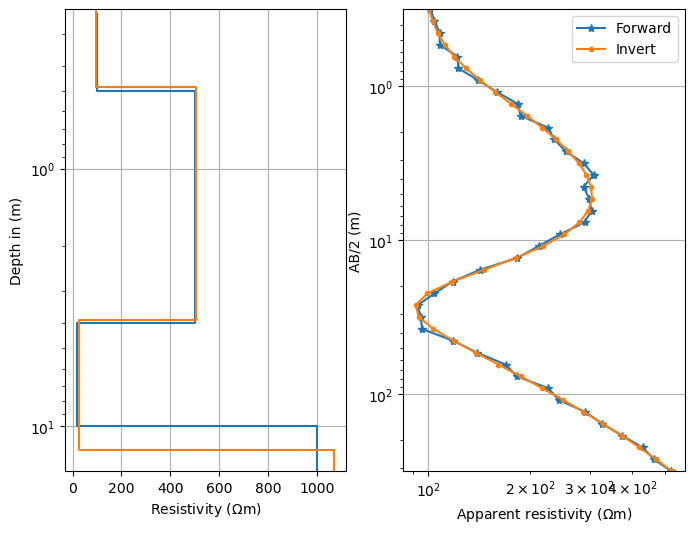

In [43]:
fig, ax = pg.plt.subplots(ncols=2, figsize=(8,6))
ves.showModel(synthModel, ax=ax[0], label="Modelo Sintetico", plot='semilogy', zmax=15)
ves.showModel(ves.model, ax=ax[0], label="Modelo Invertido", plot='semilogy', zmax=15)
ves.showData(rhoa, ax=ax[1], label="Forward", color='C0', marker='*')
out = ves.showData(ves.inv.response, ax=ax[1], label='Invert', color="C1", marker='.')

# Datos Reales

In [58]:
txt = np.loadtxt('datos_sev\sev_2.sdg.TXT', delimiter='\t', skiprows=1)
ab2 = (txt[:, 0])
mn2 = [mn/2 for mn in txt[:, 1]]
rhoa = (txt[:, 6])
ves=VESManager()

In [59]:
ves.invert(data=rhoa, error=err, ab2=ab2, mn2=mn2, nLayers=4, lam=1000, lambdaFactor=0.8, verbose=True)

19/02/24 - 23:58:24 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
19/02/24 - 23:58:24 - pyGIMLi - INFO - Created startmodel from forward operator: 7, min/max=0.250000/36.837722
19/02/24 - 23:58:24 - pyGIMLi - INFO - Starting inversion.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


fop: <pygimli.physics.ves.vesModelling.VESModelling object at 0x00000198AACC2C70>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x00000198AA595270>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001987724CD60>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000198AA7B6BE0>
min/max (data): 11.22/137
min/max (error): 1%/1%
min/max (start model): 0.25/36.84
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 4206.55
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  874.15 (dPhi = 79.22%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  817.51 (dPhi = 6.48%) lam: 800.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  768.46 (dPhi = 6.00%) lam: 640.0
---------------------------------------------------------------------

19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


chi² =  707.95 (dPhi = 5.23%) lam: 327.7
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =  632.97 (dPhi = 10.59%) lam: 262.1
--------------------------------------------------------------------------------
inv.iter 8 ... chi² =  612.77 (dPhi = 3.19%) lam: 209.7
--------------------------------------------------------------------------------
inv.iter 9 ... chi² =  601.85 (dPhi = 1.78%) lam: 167.8
--------------------------------------------------------------------------------
inv.iter 10 ... chi² =  569.94 (dPhi = 5.30%) lam: 134.2
--------------------------------------------------------------------------------
inv.iter 11 ... 

19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
19/02/24 - 23:58:24 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


chi² =  542.51 (dPhi = 4.81%) lam: 107.4
--------------------------------------------------------------------------------
inv.iter 12 ... chi² =  535.42 (dPhi = 1.31%) lam: 85.9
--------------------------------------------------------------------------------
inv.iter 13 ... chi² =  528.90 (dPhi = 1.22%) lam: 68.7
--------------------------------------------------------------------------------
inv.iter 14 ... chi² =  528.66 (dPhi = 0.05%) lam: 55.0
################################################################################
#                Abort criterion reached: dPhi = 0.05 (< 1.0%)                 #
################################################################################


7 [1.0614203927534078, 5.44563822126801, 53.333982706180755, 158.72664127440515, 34.98189871887735, 10.16850469777416, 152.18419810586067]

(<Axes: xlabel='Apparent resistivity ($\\Omega$m)', ylabel='AB/2 (m)'>, None)

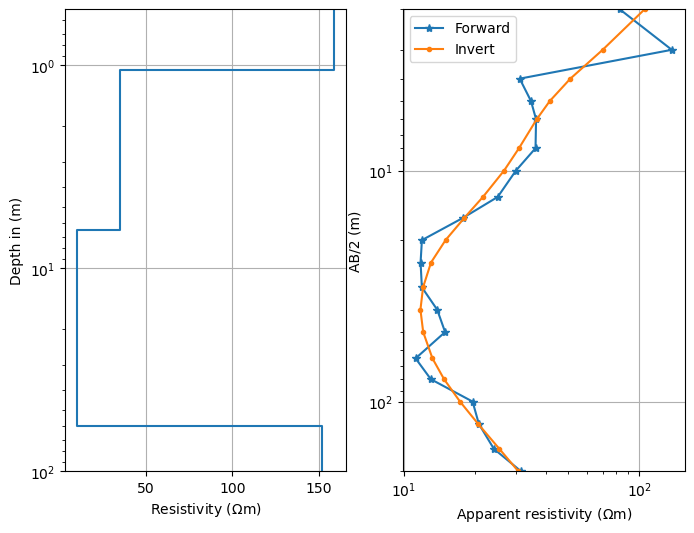

In [60]:
fig, ax = pg.plt.subplots(ncols=2, figsize=(8,6))

ves.showModel(ves.model, ax=ax[0], label="Modelo Invertido", plot='semilogy', zmax=100)
ves.showData(rhoa, ax=ax[1], label="Forward", color='C0', marker='*')
ves.showData(ves.inv.response, ax=ax[1], label='Invert', color="C1", marker='.')